<a href="https://colab.research.google.com/github/luisdiaz1997/DataScienceCourse/blob/master/Week6_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
data_url = "https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv"

In [3]:
df = pd.read_csv(data_url, sep=",")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


<Figure size 432x288 with 0 Axes>

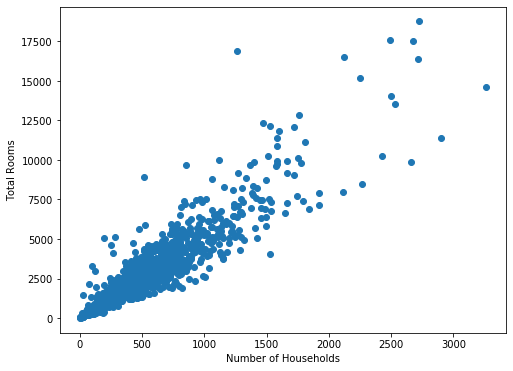

In [4]:
plt.figure(1)
x = df.households.values.reshape(-1, 1)
y = df.total_rooms.values.reshape(-1,1)
plt.figure(figsize=(8, 6))
plt.scatter(x[::10], y[::10])
plt.xlabel('Number of Households')
plt.ylabel('Total Rooms');

>$h(x) = x w + b$

In [0]:
def linear(x, w, b):
  z = np.dot(x,w) + b
  return z

In [0]:
def start_params(features = 2):
  params = {'W': np.random.randn(features, 1), 'b': np.random.randn(1, 1)}
  return params

>$J = \frac{1}{2M}\sum_{} (h(x) - y)^2 $

In [0]:
def loss(model, inputs, targets):
  error = model(inputs) - targets
  return np.sum(error **2)/inputs.shape[0]

## We decrease this cost function by gradient descent
### To make things easier

>$ \delta = h(x) - y $

>$J = \frac{1}{2M}\sum_{} (\delta)^2 $

## With chain rule

>$\frac{\partial J}{\partial W} = \frac{1}{M} \sum_{} \delta \frac{\partial \delta}{\partial W}$

>$ \frac{\partial \delta}{\partial W} = x $

>$\frac{\partial J}{\partial W} = \frac{1}{M}\sum_{} \delta x $

## Vectorizing we get
>$dW=\frac{\partial J}{\partial W} = \frac{1}{M}X^T \delta $


## Similarly for B, since dJ/db is 1

> $db = \frac{\partial J}{\partial b} = \frac{1}{M}\sum_{} \delta $

## We will update the models this way, where alpha is our learning rate

> $W=W - \alpha dW $

> $b=b - \alpha db $


In [0]:
def grad(model, inputs, targets):

  error = model(inputs) - targets
  grad_dict = {'dW': np.dot(inputs.T, error)/inputs.shape[0],
               'db': np.sum(error, axis = 0, keepdims=  True)/inputs.shape[0]}
  return grad_dict

In [0]:
class LinearRegression():
  def __init__(self, features = 2):
    self.params = start_params(features = features)
    self.costs = []
  
  def __call__(self, inputs):
    return linear(inputs, self.params['W'], self.params['b'])

  def fit(self, inputs, targets, learning_rate = 1e-3, epochs= 10):
    for i in tqdm(range(epochs)):
      self.costs.append(loss(self, inputs, targets))
      grads = grad(self, inputs, targets)

      for key, values in self.params.items():
        self.params[key] -= learning_rate * grads['d'+key]



In [0]:
model = LinearRegression(features = 1)

In [11]:
model.params

{'W': array([[0.73285349]]), 'b': array([[0.8818395]])}

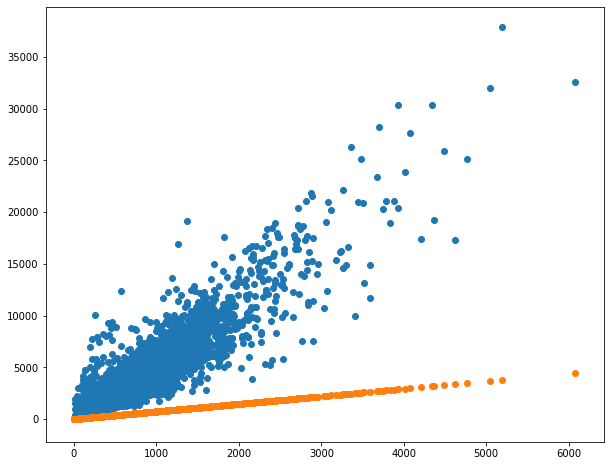

In [12]:
plt.figure(2, figsize = (10,8))

y_predict = model(x)
plt.scatter(x, y )
plt.scatter(x[:, 0], y_predict)

In [13]:
model.fit(x, y, learning_rate=1e-8, epochs = 1000)

100%|██████████| 1000/1000 [00:00<00:00, 4584.13it/s]


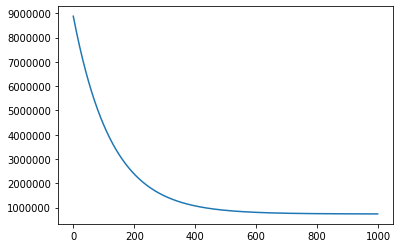

In [14]:
plt.plot(model.costs)

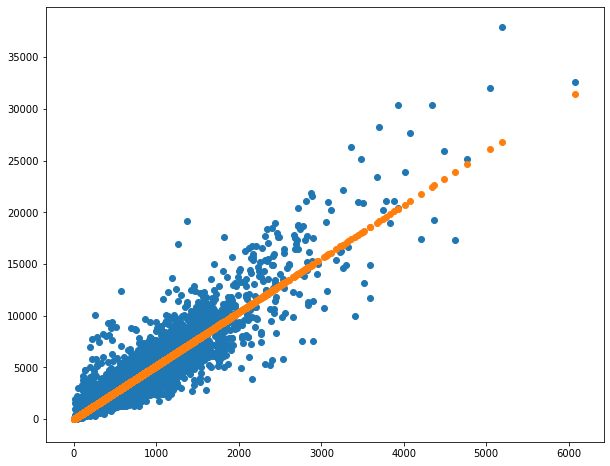

In [15]:
plt.figure(3, figsize = (10,8))

y_predict = model(x)
plt.scatter(x, y )
plt.scatter(x[:, 0], y_predict)

In [0]:
from sklearn.datasets import make_blobs
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers = np.array([[-3, -3], [1, 1]]))

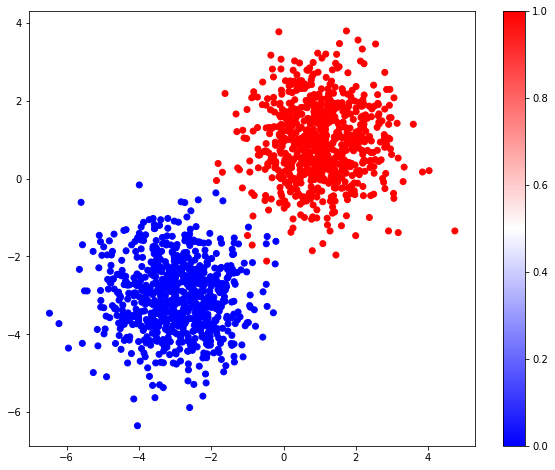

In [17]:
plt.figure(4, figsize = (10,8))
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'bwr')
plt.colorbar();

In [0]:
model2 = LinearRegression(features = 2)

In [19]:
model2.params

{'W': array([[0.17184676],
        [1.0161781 ]]), 'b': array([[0.03194295]])}

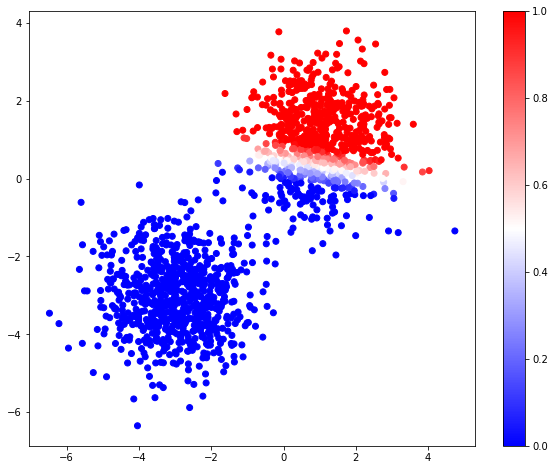

In [20]:
plt.figure(5, figsize = (10,8))

y_predict = model2(X)
plt.scatter(X[:, 0], X[:, 1], c = y_predict.reshape(-1), cmap = 'bwr', vmin = 0, vmax = 1)
plt.colorbar();

In [21]:
model2.fit(X, y[:, None], learning_rate = 1e-3, epochs = 10000)

100%|██████████| 10000/10000 [00:00<00:00, 15841.85it/s]


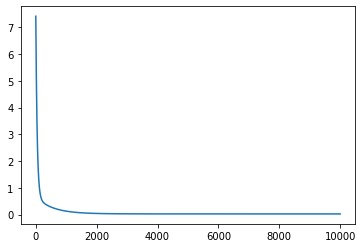

In [22]:
plt.plot(model2.costs)

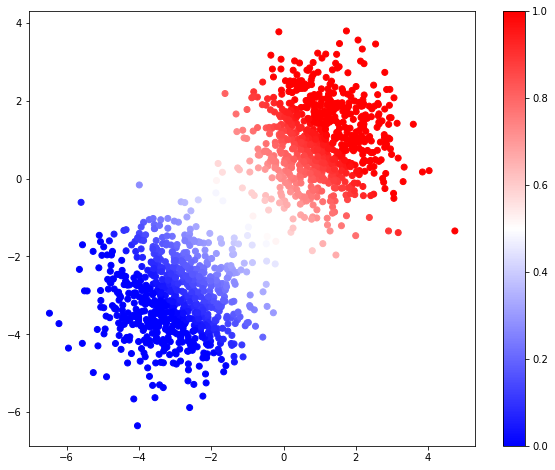

In [23]:
plt.figure(6, figsize = (10,8))

y_predict = model2(X)
plt.scatter(X[:, 0], X[:, 1], c = y_predict.reshape(-1), cmap = 'bwr', vmin = 0, vmax = 1)
plt.colorbar();

In [24]:
model2.params

{'W': array([[0.10878054],
        [0.11502356]]), 'b': array([[0.73000119]])}